# Coding Project - Image enhacement: 

The code below enhance automatically a photograph while keeping a natural look to it. 
The code works with different RGB photographs. The resulting image is saved in the current working directory as 'result.jpg'.

In order to realize the enhacement, 5 operations are implemented :
* The input image: 
<img src="./etretat.jpg" width="250px" />
* **Step 1: Image Denoising**
It is important to start by reducing the noise from the image to restore as much as possible the true image that will subsequently be enhanced. The **median filter** is the best filter for this operation. It is applied to the 3 channels of the RGB image. The disk value chosen is small (disk = 2.5) to keep as close as possible to the true image.
<img src="./denoised.jpg" width="250px" />
      
* **Step 2: Improve Global Contrast**
The aim is for the areas of lower contrast to gain a higher contrast. **Histogram Equalization**  is used for this. After converting the denoised image to HSV, the method 'equalize_hist' from the module 'exposure' is applied to the the value channel. 
<img src="./im_equalized.jpg" width="250px" />
    
* **Step 3: Improve Brightness**
As you can see, because of the histogram equalization, very dark regions appeared. To solve this, **gamma correction** is applied on the image with a power smaller than 1 (gamma = 0.6) to make dark regions lighter. 
<img src="./gammacorrected.jpg" width="250px" />
    
* **Step 4: Increase Colour Saturation**
To make the image less grey, it is needed to adjust the histogram of the saturation channel. Tha aim is to reduce the pic around 0.0 which corresponds to the grey color. To do this, the method 'equalize_adapthist' from the module 'exposure' is used. This method is well suited for increasing colour saturation because the **histogram equalization** is computed locally therefore details are enhanced and the colors are brighter.
<img src="./colorsaturated.jpg" width="250px" />

* **Step 5: Increase Sharpness**
Because of the filters applied, the image looks more blurred compared to the input one. To make it sharper, a filter was built in two steps:
1: Original - Smoothed = Details 2: Original + Details = Sharpened
The original picture is the image after the colour saturation and the smoothed image is created by applying a **gaussian filter** to each RGB channel of the original image. 
<img src="./sharp.jpg" width="250px" />



    

     
  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


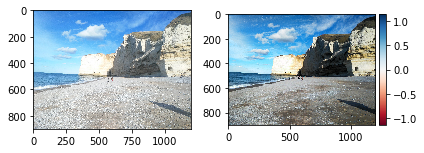

In [2]:
# -- Your code here -- #
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from skimage.color import rgb2hsv, hsv2rgb
from skimage.io import imread,imshow,imsave

im = imread('etretat.jpg')

# Image Denoising - Median filter
from skimage.filters.rank import median
from skimage.morphology import disk #Disk is used for smoother results
im_denoised = im.copy()
im_denoised[:,:,0] = median(im_denoised[:,:,0], disk(2.5)) 
im_denoised[:,:,1] = median(im_denoised[:,:,1], disk(2.5))
im_denoised[:,:,2] = median(im_denoised[:,:,2], disk(2.5))

#Histogram Equalization
from skimage import exposure
hsv1= rgb2hsv(im_denoised)
eq_value = exposure.equalize_hist(hsv1[:,:,2])
hsv1[:,:,2] = eq_value
im_eq = hsv2rgb(hsv1)

#Gamma correction
im_gammacorr = exposure.adjust_gamma(im_eq, 0.6) #Value smaller than 1 to lighten dark regions

#Increase colour saturation
hsv2 = rgb2hsv(im_gammacorr.copy())
hsv2[:,:,1] = exposure.equalize_adapthist(hsv2[:,:,1])
im_colorsat = hsv2rgb(hsv2)

#Increase sharpness
from scipy.ndimage import gaussian_filter
im_gaussian_r = gaussian_filter(im_colorsat[:,:,0], sigma=(2))
im_gaussian_g = gaussian_filter(im_colorsat[:,:,1], sigma=(2))
im_gaussian_b = gaussian_filter(im_colorsat[:,:,2], sigma=(2))
im_details_r = im_colorsat[:,:,0] - im_gaussian_r
im_details_g = im_colorsat[:,:,1] - im_gaussian_g
im_details_b = im_colorsat[:,:,2] - im_gaussian_b
im_sharpened = im_colorsat.copy()
factor = 0.5 #trial and error approach
im_sharpened[:,:,0] = im_colorsat[:,:,0] + factor*im_details_r
im_sharpened[:,:,1] = im_colorsat[:,:,1] + factor*im_details_g
im_sharpened[:,:,2] = im_colorsat[:,:,2] + factor*im_details_b
 
plt.figure()
plt.subplot(1,2,1)
imshow(im)
plt.subplot(1,2,2)
imshow(im_sharpened)



